In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
data = pd.read_csv('day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
data.shape

(731, 16)

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Все поля числовые кроме dteday

In [8]:
data.corr() #корреляция

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [9]:
data[['temp', 'atemp']].corr() #Видна большая корреляция между данными переменными

,temp,atemp
temp,1.000000,0.991702
atemp,0.991702,1.000000


In [10]:
data[['registered', 'cnt']].corr() #Видна большая корреляция между данными переменными

,registered,cnt
registered,1.000000,0.945517
cnt,0.945517,1.000000


Text(0.5, 1.0, 'Карта корреляции данных')

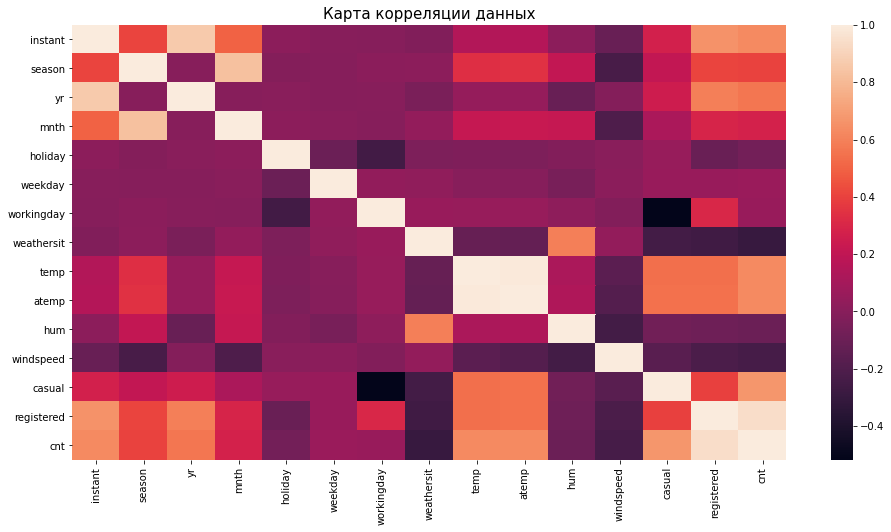

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
sns.heatmap(data.corr(), ax = ax)
plt.title('Карта корреляции данных', fontsize = 15)

# На мой взгляд следует исключить признаки, которые имеют выоскую корреляцию между собой или с целевым значением, чтобы избежать линнейную зависимость.
# Уберем следубщие признаки:
## *instant
## *mnth
## *atemp
## *casual
## *registered

In [12]:
df = data.drop(['instant', 'mnth', 'atemp', 'casual', 'registered'], axis = 1)
df

,dteday,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,0,4,1,2,0.254167,0.652917,0.350133,2114
727,2012-12-28,1,1,0,5,1,2,0.253333,0.590000,0.155471,3095
728,2012-12-29,1,1,0,6,0,2,0.253333,0.752917,0.124383,1341
729,2012-12-30,1,1,0,0,0,1,0.255833,0.483333,0.350754,1796


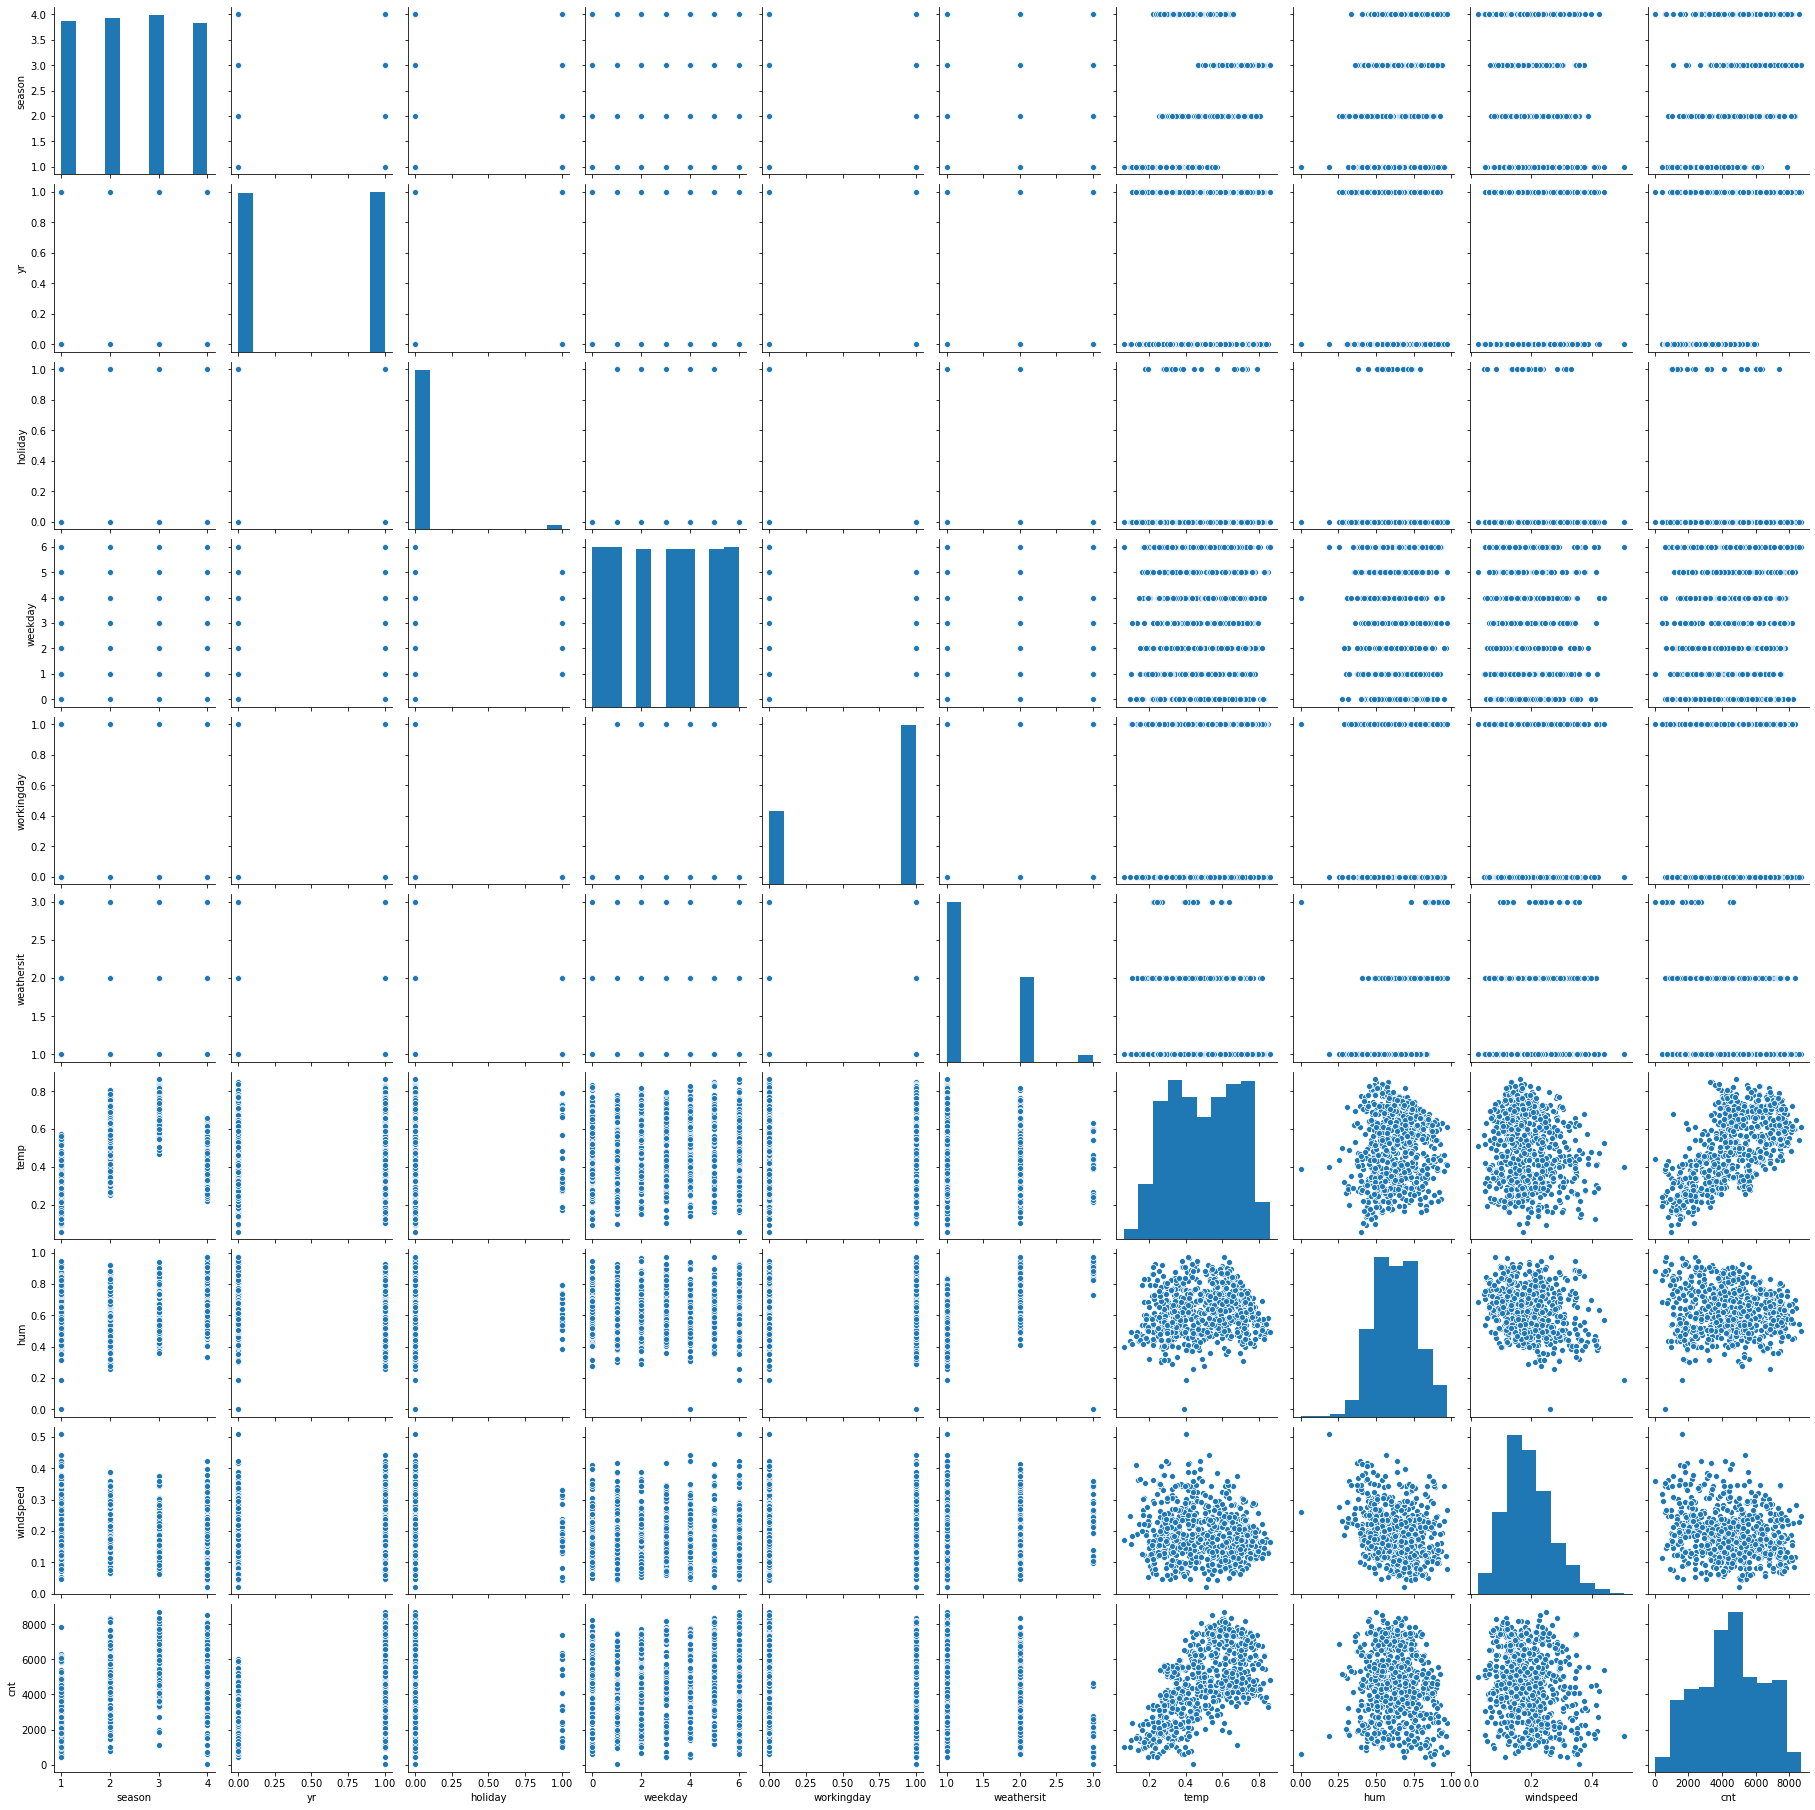

In [12]:
sns.pairplot(data = df)

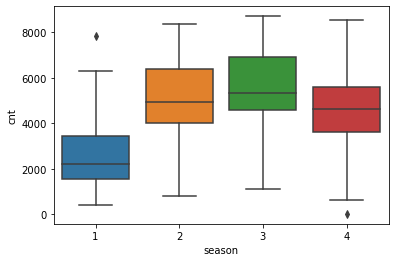

In [13]:
sns.boxplot(x = 'season', y = 'cnt', data = df)

In [14]:
pd.to_datetime(df[df['season'] == 1]['dteday']).dt.month.min()

1

In [15]:
seas = pd.DataFrame()
seas['1_start'] = (pd.to_datetime(df[df['season'] == 1]['dteday']).dt.month.min(), )
seas['1_end'] = pd.to_datetime(df[df['season'] == 1]['dteday']).dt.month.max()
seas['2_start'] = pd.to_datetime(df[df['season'] == 2]['dteday']).dt.month.min()
seas['2_end'] = pd.to_datetime(df[df['season'] == 2]['dteday']).dt.month.max()
seas['3_start'] = pd.to_datetime(df[df['season'] == 3]['dteday']).dt.month.min()
seas['3_end'] = pd.to_datetime(df[df['season'] == 3]['dteday']).dt.month.max()
seas['4_start'] = pd.to_datetime(df[df['season'] == 4]['dteday']).dt.month.min()
seas['4_end'] = pd.to_datetime(df[df['season'] == 4]['dteday']).dt.month.max()
seas

,1_start,1_end,2_start,2_end,3_start,3_end,4_start,4_end
0,1,12,3,6,6,9,9,12


Самые высокие показатели "количества поездок" наблюдаются в летний сезон ЛЕТОМ (так как 3 сезон идет с июня по сентябрь)

In [16]:
feat = df.drop(['cnt', 'dteday'], axis = 1)
target = df['cnt']

In [17]:
feat

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,0,6,0,2,0.344167,0.805833,0.160446
1,1,0,0,0,0,2,0.363478,0.696087,0.248539
2,1,0,0,1,1,1,0.196364,0.437273,0.248309
3,1,0,0,2,1,1,0.200000,0.590435,0.160296
4,1,0,0,3,1,1,0.226957,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...
726,1,1,0,4,1,2,0.254167,0.652917,0.350133
727,1,1,0,5,1,2,0.253333,0.590000,0.155471
728,1,1,0,6,0,2,0.253333,0.752917,0.124383
729,1,1,0,0,0,1,0.255833,0.483333,0.350754


In [18]:
target

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(feat, target, test_size=0.3)

In [20]:
X_train.shape, X_test.shape

((511, 9), (220, 9))

In [21]:
#создаем шкалировщик
scaler = preprocessing.StandardScaler().fit(X_train)

In [22]:
#Преобразовать признаки
#X_train_scaler = scaler.fit_transform(X_train)
#X_test_scaler = scaler.fit_transform(X_test)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [23]:
X_train_scaler, X_test_scaler

(array([[ 0.44072317, -0.96726732, -0.16156862, ...,  1.01732563,
         -0.803372  , -1.22552657],
        [-1.36095315, -0.96726732, -0.16156862, ..., -1.68970117,
         -0.85171825, -1.04453239],
        [ 1.34156133,  1.03384037, -0.16156862, ..., -0.66913383,
          0.38753842, -1.37800423],
        ...,
        [-0.46011499,  1.03384037, -0.16156862, ..., -0.03498762,
         -2.16192991,  2.17908463],
        [-1.36095315,  1.03384037, -0.16156862, ..., -0.88970643,
         -0.6039238 , -0.27805723],
        [ 0.44072317, -0.96726732, -0.16156862, ...,  0.7631874 ,
          2.15353953,  0.04269555]]),
 array([[ 1.34156133,  1.03384037, -0.16156862, ...,  0.18558498,
         -1.12422346,  0.43666363],
        [ 0.44072317,  1.03384037, -0.16156862, ...,  0.47048757,
          0.731512  , -0.48680478],
        [ 0.44072317, -0.96726732, -0.16156862, ...,  1.04489721,
          0.65058112, -0.64736195],
        ...,
        [ 0.44072317, -0.96726732, -0.16156862, ...,  

In [24]:
round(X_train_scaler.mean(), 2)

-0.0

In [25]:
X_train_scaler.std()

1.0

In [26]:
def learn(X_train, X_test, Y_train, Y_test, columns, model_name = 'LinearRegression', alphas =[0.5]):
    if model_name == 'LinearRegression':
        model = LinearRegression()
        model.fit(X_train, Y_train)
        score = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
        coef = pd.DataFrame(zip(['intercept'] + columns, [model.intercept_] + model.coef_.tolist()),
                            columns = ['predict', 'coef'])
        display(coef)
        pred = model.predict(X_test)
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        return score, pred, RMSE
    
    elif model_name == 'Ridge':
        if len(alphas) > 1:
            return 'Передайте в гребневую регрессию один гиперпараметр'
        else:
            model = Ridge(alphas[0])
            model.fit(X_train, Y_train)
            score = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
            coef = pd.DataFrame(zip(['intercept'] + columns, [model.intercept_] + model.coef_.tolist()),
                            columns = ['predict', 'coef'])
            display(coef)
            pred = model.predict(X_test)
            RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
            return score, pred, RMSE
 
    elif model_name == 'Lasso':
        if len(alphas) > 1:
            return 'Передайте в Лассо регрессию один гиперпараметр'
        else:
            model = Lasso(alphas[0])
            model.fit(X_train, Y_train)
            score = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
            coef = pd.DataFrame(zip(['intercept'] + columns, [model.intercept_] + model.coef_.tolist()),
                            columns = ['predict', 'coef'])
            display(coef)
            pred = model.predict(X_test)
            RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
            return score, pred, RMSE                                      
    
    elif model_name == 'RidgeCV':
        model = RidgeCV(alphas)
        model.fit(X_train, Y_train)
        score = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
        coef = pd.DataFrame(zip(['intercept'] + columns, [model.intercept_] + model.coef_.tolist()),
                        columns = ['predict', 'coef'])
        display(coef)
        pred = model.predict(X_test)
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        alpha = 'Идеальное значение альфа = {}'.format(model.alpha_)
        return score, pred, RMSE, alpha
 
    elif model_name == 'LassoCV':
        model = LassoCV(alphas = alphas)
        model.fit(X_train, Y_train)
        score = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
        coef = pd.DataFrame(zip(['intercept'] + columns, [model.intercept_] + model.coef_.tolist()),
                        columns = ['predict', 'coef'])
        display(coef)
        pred = model.predict(X_test)
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        alpha = 'Идеальное значение альфа = {}'.format(model.alpha_)
        return score, pred, RMSE, alpha

In [27]:
learn(X_train_scaler, X_test_scaler, Y_train, Y_test, feat.columns.tolist())

,predict,coef
0,intercept,4464.577299
1,season,453.123096
2,yr,1003.245483
3,holiday,-76.714758
4,weekday,158.483541
5,workingday,65.471244
6,weathersit,-375.391163
7,temp,955.379686
8,hum,-153.054589
9,windspeed,-227.582704


('Качество модели (R^2) = 0.7934540049057297',
 array([6312.30651168, 5626.87908829, 4532.17258093, 4031.00305265,
        4036.04371911, 1916.44362364, 6122.78984819, 7557.34590382,
        3898.16237915, 4018.63856916, 5456.68148392, 2359.88398787,
        7248.00383617, 6060.47654767, 6398.51637396, 3872.24797842,
        7031.52315869, 4814.56856259, 4205.08334463, 4786.68562576,
        2800.26201496, 5023.66843497, 3992.07270869, 7206.46701625,
        7501.81384899, 2605.96957323, 5307.87109528, 4994.00476908,
        1481.91384687, 3204.01838745, 4197.16757345, 3506.86474727,
        7236.5590294 , 4334.29187997, 6303.44764525, 1436.43355654,
        4369.79958005, 4955.65381321, 2223.0369674 , 2776.29413512,
        3746.38994778, 5960.0130086 , 5284.68108752, 6575.97800497,
        6274.75378035, 3108.37527208, 2997.39728835, 2447.15530926,
        4061.13809691, 4602.15306303, 7139.15501072, 4479.53648747,
        4656.10345589, 4929.62293077, 1396.38069551, 6189.87857828,
 

In [28]:
learn(X_train_scaler, X_test_scaler, Y_train, Y_test, feat.columns.tolist(), 
      model_name = 'Ridge', alphas = [100])

,predict,coef
0,intercept,4464.577299
1,season,408.404643
2,yr,844.033429
3,holiday,-77.558488
4,weekday,130.252835
5,workingday,65.612130
6,weathersit,-336.824958
7,temp,815.892648
8,hum,-123.999635
9,windspeed,-211.537938


('Качество модели (R^2) = 0.7777814493063114',
 array([6049.82679412, 5461.71935645, 4544.41828797, 4069.25739116,
        4068.22867133, 2186.81767532, 5861.85370139, 7117.36954434,
        4056.39525953, 4080.09804172, 5329.0019608 , 2685.26199524,
        6847.40779066, 5818.88813275, 6143.2381087 , 3991.98911576,
        6694.53687666, 4822.21264976, 4319.75140738, 4655.96769863,
        3014.82243765, 4952.70636314, 4083.4108878 , 6732.96838425,
        7076.94913724, 2798.50703904, 5182.59716855, 4930.8302002 ,
        1895.35735027, 3433.08781008, 4186.17285263, 3621.24674124,
        6876.79001705, 4435.25216767, 5974.99879821, 1843.42121734,
        4367.06215658, 4908.1117856 , 2496.02631325, 2990.04982664,
        3885.29377615, 5795.67309219, 5172.84012327, 6259.05164362,
        5975.9043184 , 3149.11316846, 3143.94459453, 2755.40330852,
        4157.93172462, 4612.05756286, 6734.14375889, 4486.51011156,
        4611.47033431, 4810.13704796, 1826.36617019, 5947.40085112,
 

In [29]:
learn(X_train_scaler, X_test_scaler, Y_train, Y_test, feat.columns.tolist(), 
      model_name = 'Lasso', alphas = [100])

,predict,coef
0,intercept,4464.577299
1,season,364.166082
2,yr,913.858109
3,holiday,-13.477421
4,weekday,74.897152
5,workingday,0.000000
6,weathersit,-350.379340
7,temp,889.802793
8,hum,-16.740362
9,windspeed,-126.077402


('Качество модели (R^2) = 0.7738231214073398',
 array([6169.63929366, 5568.94093622, 4421.87546508, 4089.55297314,
        3968.71323165, 2403.952406  , 6289.13657869, 7165.64517735,
        3653.17440658, 3956.89207718, 5311.66212279, 2810.09286908,
        7017.56924665, 5755.12540786, 5924.81029245, 3705.90572219,
        6608.47772728, 4788.41257175, 3952.60521428, 4959.18638485,
        3205.70773457, 4748.30538758, 3954.70491409, 7278.87945282,
        7023.70057853, 2972.91144948, 5325.17450557, 4838.5258279 ,
        1784.87043443, 3157.31263639, 4363.90981332, 3679.24268519,
        6856.7080543 , 4352.14411825, 6748.08895872, 1580.67717249,
        4187.5573695 , 5100.63152249, 2527.51318547, 2983.24550318,
        3783.44173336, 5596.94596745, 4962.41630399, 6419.96802958,
        6052.94367544, 3717.13914467, 3170.66231964, 2530.35310153,
        4009.73813453, 4891.45277339, 6712.70180846, 4416.56581541,
        4521.43231042, 5052.97830864, 1803.05495999, 6233.4497519 ,
 

In [30]:
learn(X_train_scaler, X_test_scaler, Y_train, Y_test, feat.columns.tolist(), 
      model_name = 'RidgeCV', alphas = np.linspace(0.1, 1000, 100))

,predict,coef
0,intercept,4464.577299
1,season,453.075454
2,yr,1003.056361
3,holiday,-76.718176
4,weekday,158.449249
5,workingday,65.473765
6,weathersit,-375.352628
7,temp,955.213200
8,hum,-153.016595
9,windspeed,-227.566029


('Качество модели (R^2) = 0.7934539833240912',
 array([6312.00020521, 5626.68309534, 4532.18545835, 4031.04814896,
        4036.07855882, 1916.73943934, 6122.48060612, 7556.82777377,
        3898.36754246, 4018.70869404, 5456.5323476 , 2360.27113726,
        7247.53027921, 6060.19042283, 6398.22377655, 3872.39488588,
        7031.13503246, 4814.59039688, 4205.2369823 , 4786.52029166,
        2800.50633293, 5023.58647995, 3992.18229396, 7205.89195133,
        7501.31631362, 2606.18360401, 5307.72438552, 4993.93372756,
        1482.3931545 , 3204.30288682, 4197.14618679, 3506.99473371,
        7236.1453252 , 4334.43124568, 6303.05158137, 1436.90149567,
        4369.7959636 , 4955.60651509, 2223.34890376, 2776.54067771,
        3746.55733851, 5959.83521363, 5284.54931031, 6575.60803505,
        6274.39501797, 3108.39439774, 2997.56300267, 2447.5210992 ,
        4061.2597219 , 4602.17174691, 7138.67357063, 4479.5448177 ,
        4656.04922964, 4929.47025703, 1396.88207253, 6189.59019657,
 

In [31]:
learn(X_train_scaler, X_test_scaler, Y_train, Y_test, feat.columns.tolist(), 
      model_name = 'LassoCV', alphas = np.linspace(0.1, 1000, 100))

,predict,coef
0,intercept,4464.577299
1,season,453.034730
2,yr,1003.157777
3,holiday,-76.653619
4,weekday,158.402976
5,workingday,65.394755
6,weathersit,-375.380551
7,temp,955.310026
8,hum,-152.907085
9,windspeed,-227.478767


('Качество модели (R^2) = 0.7934539848943333',
 array([6312.17647281, 5626.80176645, 4532.04190237, 4031.06672333,
        4035.97133303, 1916.90669125, 6122.98173894, 7556.93600528,
        3897.9238059 , 4018.59802721, 5456.55890427, 2360.34584283,
        7247.77917302, 6060.16217311, 6398.03814702, 3872.07571305,
        7031.10144783, 4814.54421878, 4204.83724401, 4786.86617461,
        2800.64790094, 5023.37573869, 3992.02065032, 7206.5396366 ,
        7501.32840898, 2606.3661631 , 5307.90753486, 4993.87069604,
        1482.19531995, 3203.97849791, 4197.34986323, 3507.024079  ,
        7236.18048722, 4334.31627358, 6303.91140658, 1436.55183197,
        4369.61813228, 4955.79919764, 2223.3285318 , 2776.53190025,
        3746.40537553, 5959.65497495, 5284.33762359, 6575.85977862,
        6274.5565477 , 3108.98568737, 2997.57191401, 2447.22819878,
        4061.08507597, 4602.46786283, 7138.71090069, 4479.49824524,
        4655.96296462, 4929.72859892, 1396.77413977, 6189.92582494,
 

In [32]:
model = Lasso(alpha = 0.004)
model.fit(X_train_scaler, Y_train)
print("Качество модели Лассо (R^2) = {}".format(model.score(X_train_scaler, Y_train)))
p1 = model.predict(X_test_scaler)
print("RMSE = {}".format(mean_squared_error(Y_test, p1, squared = False)))

Качество модели Лассо (R^2) = 0.7934540048737173
RMSE = 893.7823221575345


In [33]:
model = Ridge(alpha = 5)
model.fit(X_train_scaler, Y_train)
print("Качество модели Лассо (R^2) = {}".format(model.score(X_train_scaler, Y_train)))
p2 = model.predict(X_test_scaler)
print("RMSE = {}".format(mean_squared_error(Y_test, p2, squared = False)))

Качество модели Лассо (R^2) = 0.79340096690554
RMSE = 893.118851060248


In [34]:
model = RidgeCV(alphas = np.linspace(0.1, 100, num = 10000)) 
model.fit(X_train_scaler, Y_train)
print("Качество модели Лассо (R^2) = {}".format(model.score(X_train_scaler, Y_train)))
p3 = model.predict(X_test_scaler)
print("RMSE = {}".format(mean_squared_error(Y_test, p3, squared = False)))
print('Идеальное значение альфа = {}'.format(model.alpha_))

Качество модели Лассо (R^2) = 0.7934121736720136
RMSE = 893.1805472534078
Идеальное значение альфа = 4.436093609360936


In [35]:
model = LassoCV(alphas = np.linspace(0.1, 100, num = 1000))
model.fit(X_train_scaler, Y_train)
print("Качество модели Лассо (R^2) = {}".format(model.score(X_train_scaler, Y_train)))
p4 = model.predict(X_test_scaler)
print("RMSE = {}".format(mean_squared_error(Y_test, p4, squared = False)))
print('Идеальное значение альфа = {}'.format(model.alpha_))

Качество модели Лассо (R^2) = 0.7934488642247862
RMSE = 893.3058107811607
Идеальное значение альфа = 1.6


In [36]:
def regression_coef(model, featers, target, X_test, Y_test, col = feat.columns.tolist(), metod = 'LinearRegression'):
    model.fit(featers, target)
    pred = model.predict(X_test)
    coef = pd.DataFrame()
    coef['Метод обучения'] = (metod, )
    coef['RMSE'] = mean_squared_error(Y_test, pred, squared = False)
    coef['R^2'] = model.score(featers, target)
    return coef

In [37]:
model = Lasso(alpha = 6)
display(regression_coef(model, X_train_scaler, Y_train, X_test_scaler, Y_test, metod = 'Lasso'))

,Метод обучения,RMSE,R^2
0,Lasso,892.094355,0.793382


In [38]:
model = Ridge(alpha = 6)
display(regression_coef(model, X_train_scaler, Y_train, X_test_scaler, Y_test, metod = 'Ridge'))

,Метод обучения,RMSE,R^2
0,Ridge,893.017573,0.793378


In [40]:
model = LassoCV(alphas = np.linspace(0.1, 10, num = 1000))
display(regression_coef(model, X_train_scaler, Y_train, X_test_scaler, Y_test, metod = 'LassoCV'))

,Метод обучения,RMSE,R^2
0,LassoCV,893.315666,0.793449


In [41]:
model = RidgeCV(alphas = np.linspace(0.1, 10, num = 100))
display(regression_coef(model, X_train_scaler, Y_train, X_test_scaler, Y_test, metod = 'RidgeCV'))

,Метод обучения,RMSE,R^2
0,RidgeCV,893.184609,0.793413


Качество модели R^2 = 0.7934490763943176


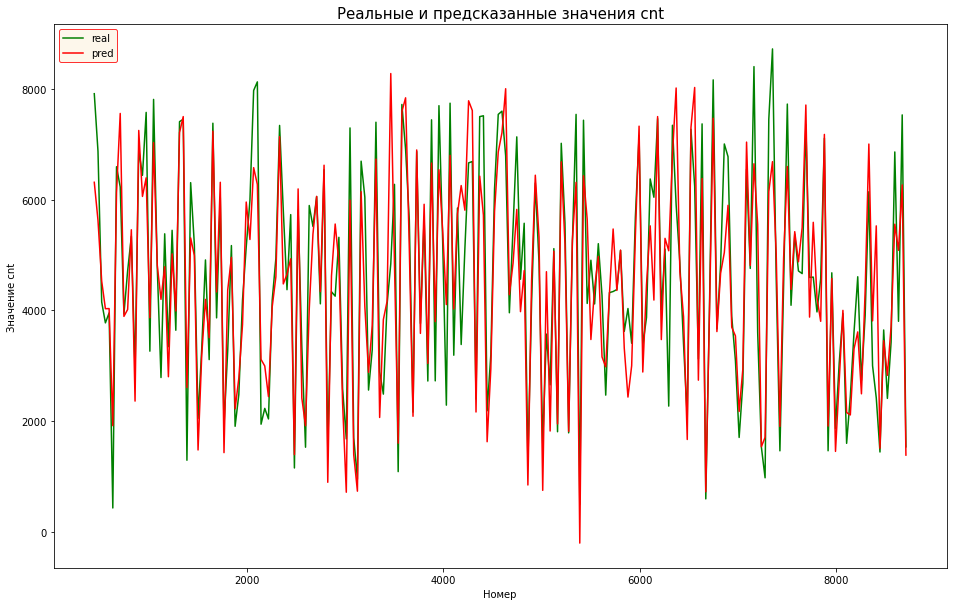

In [43]:
y = Y_test
model = LassoCV(alphas = np.linspace(0.1, 10, num = 1000))
model.fit(X_train_scaler, Y_train)

print("Качество модели R^2 = {}".format(model.score(X_train_scaler, Y_train)))

fig = plt.figure(figsize=(16, 10))

plt.plot(np.linspace(min(y), max(y), len(y)), y, color='green', 
         alpha=1, 
         label = 'real')
plt.plot(np.linspace(min(y), max(y), len(y)), model.predict(X_test_scaler), color='r', 
         alpha=1,
         label = 'pred')

plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')

plt.xlabel('Номер')
plt.ylabel('Значение cnt')
plt.title("Реальные и предсказанные значения cnt", fontsize = 15)

plt.show()

Качество модели R^2 = 0.7933921475648975


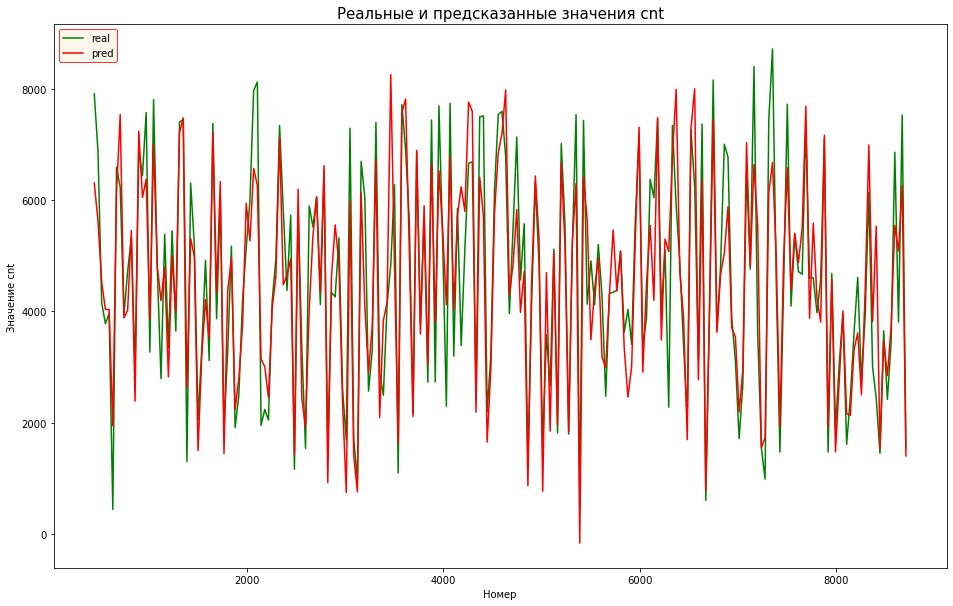

In [44]:
y = Y_test
model = Lasso(alpha = 5.546)
model.fit(X_train_scaler, Y_train)

print("Качество модели R^2 = {}".format(model.score(X_train_scaler, Y_train)))

fig = plt.figure(figsize=(16, 10))

plt.plot(np.linspace(min(y), max(y), len(y)), y, color='green', 
         alpha=1, 
         label = 'real')
plt.plot(np.linspace(min(y), max(y), len(y)), model.predict(X_test_scaler), color='r', 
         alpha=1,
         label = 'pred')

plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')

plt.xlabel('Номер')
plt.ylabel('Значение cnt')
plt.title("Реальные и предсказанные значения cnt", fontsize = 15)

plt.show()

Качество модели R^2 = 0.7934491728224012


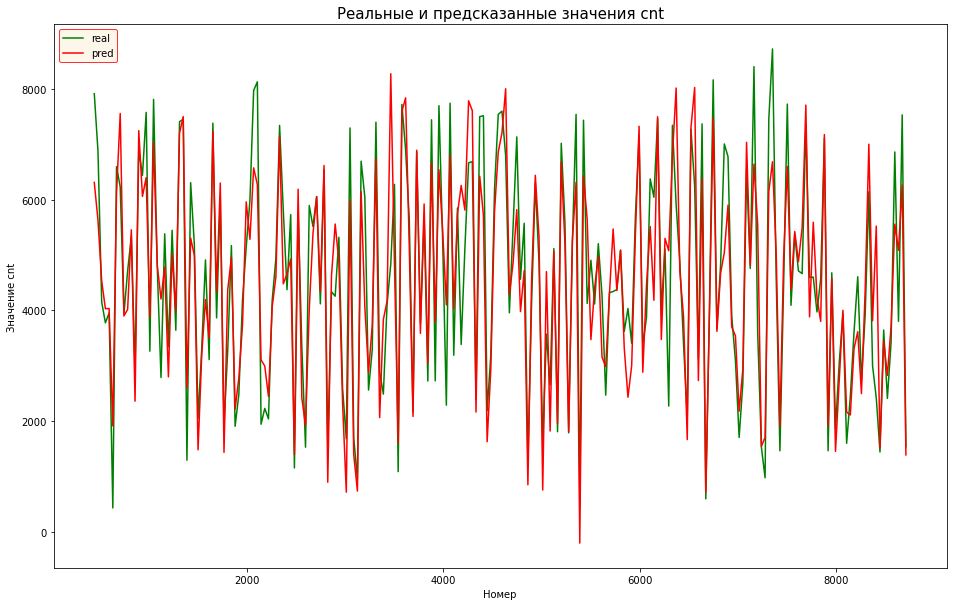

In [45]:
y = Y_test
model = Ridge(alpha = 1.5)
model.fit(X_train_scaler, Y_train)

print("Качество модели R^2 = {}".format(model.score(X_train_scaler, Y_train)))

fig = plt.figure(figsize=(16, 10))

plt.plot(np.linspace(min(y), max(y), len(y)), y, color='green', 
         alpha=1, 
         label = 'real')
plt.plot(np.linspace(min(y), max(y), len(y)), model.predict(X_test_scaler), color='r', 
         alpha=1,
         label = 'pred')


plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')

plt.xlabel('Номер')
plt.ylabel('Значение cnt')
plt.title("Реальные и предсказанные значения cnt", fontsize = 15)

plt.show()

Качество модели R^2 = 0.7738231214073398


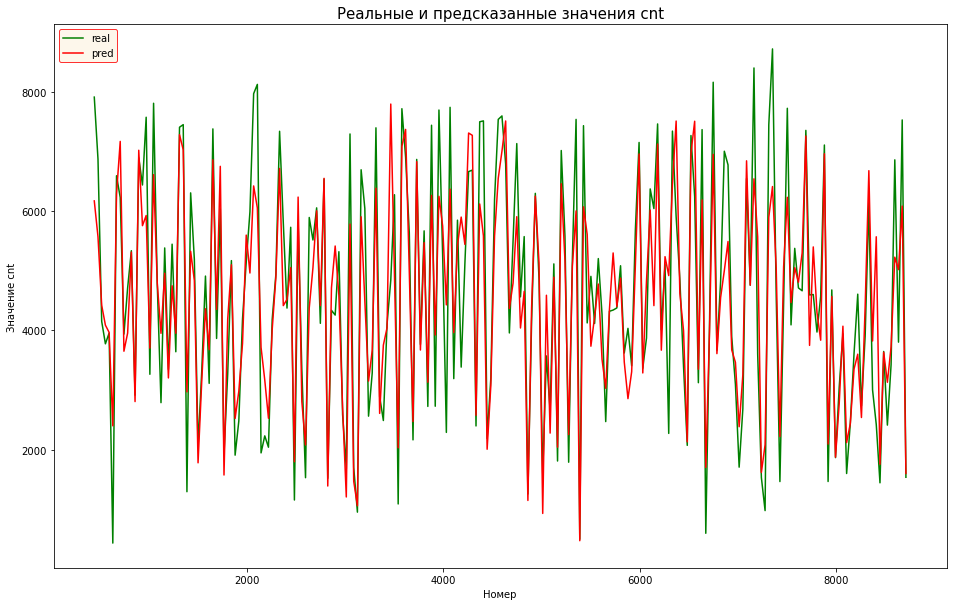

In [46]:
y = Y_test
model =Lasso(alpha = 100)
model.fit(X_train_scaler, Y_train)

print("Качество модели R^2 = {}".format(model.score(X_train_scaler, Y_train)))

fig = plt.figure(figsize=(16, 10))

plt.plot(np.linspace(min(y), max(y), len(y)), y, color='green', 
         alpha=1, 
         label = 'real')
plt.plot(np.linspace(min(y), max(y), len(y)), model.predict(X_test_scaler), color='r', 
         alpha=1,
         label = 'pred')


plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')

plt.xlabel('Номер')
plt.ylabel('Значение cnt')
plt.title("Реальные и предсказанные значения cnt", fontsize = 15)

plt.show()

Качество модели R^2 = 0.7934540049057297


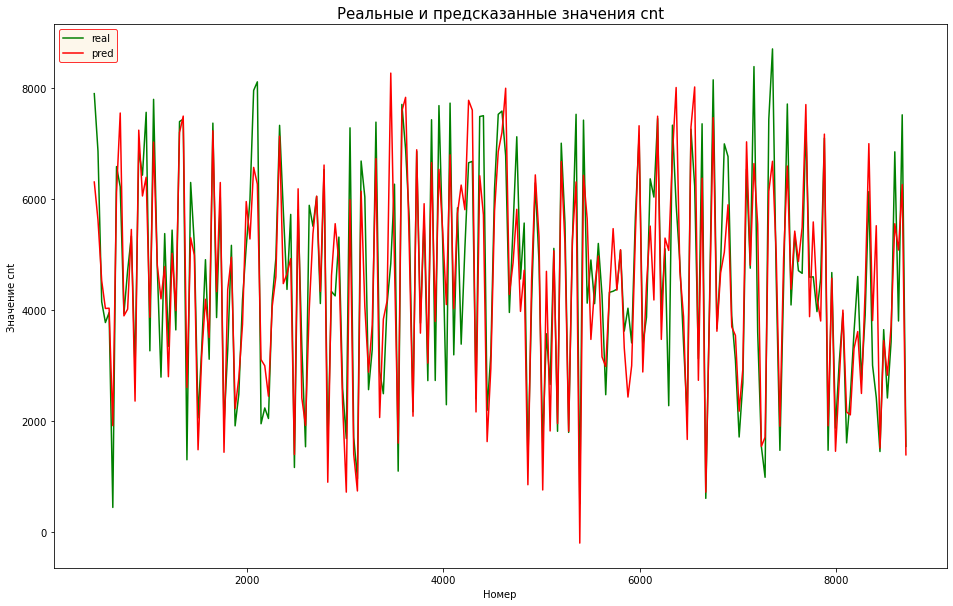

In [47]:
y = Y_test
model = LinearRegression()
model.fit(X_train_scaler, Y_train)

print("Качество модели R^2 = {}".format(model.score(X_train_scaler, Y_train)))

fig = plt.figure(figsize=(16, 10))

plt.plot(np.linspace(min(y), max(y), len(y)), y, color='green', 
         alpha=1, 
         label = 'real')
plt.plot(np.linspace(min(y), max(y), len(y)), model.predict(X_test_scaler), color='r', 
         alpha=1,
         label = 'pred')

plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
          loc = 'upper left')

plt.xlabel('Номер')
plt.ylabel('Значение cnt')
plt.title("Реальные и предсказанные значения cnt", fontsize = 15)

plt.show()

# После того, как была проведена предварительная обработка данных, были удалены признаки с линейной завивимостью, результаты заметно улучшились, об это свидетельствует RMSE (варьируется в завивисомти от гиперпарметров от 800-900), coef (не являются слишком большими), R^2 (приблизительно равняется 0,8)